<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [77]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [78]:
house = pd.read_csv('../../datasets/housing_regression/housing.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

In [79]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


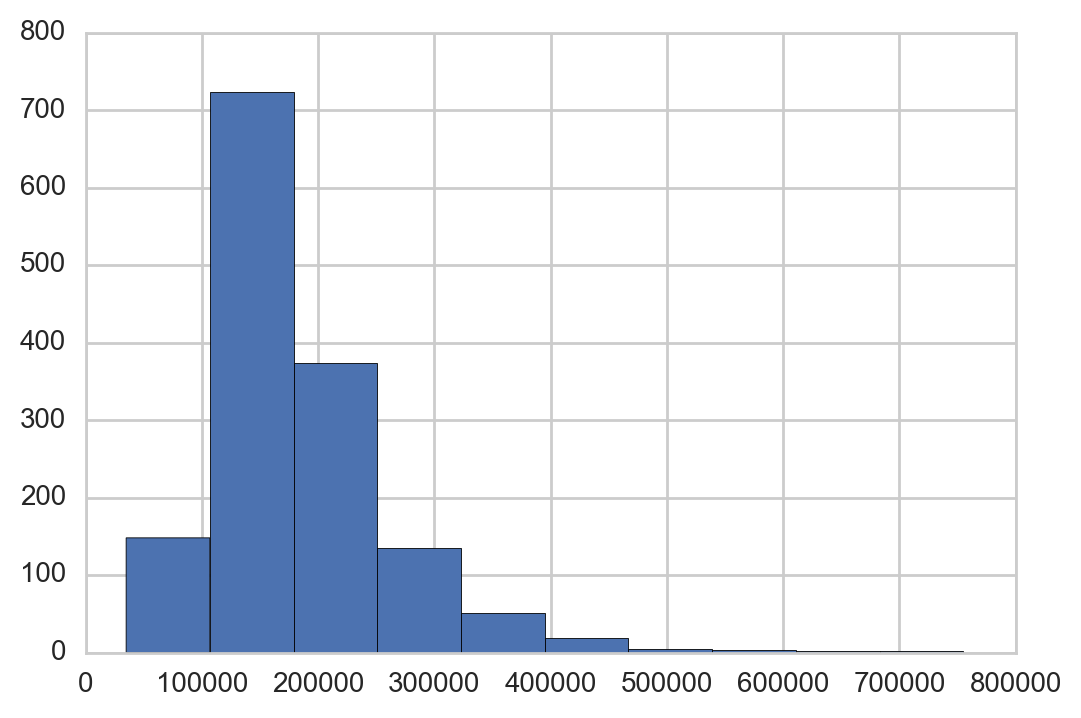

In [81]:
house.SalePrice.hist()

In [82]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

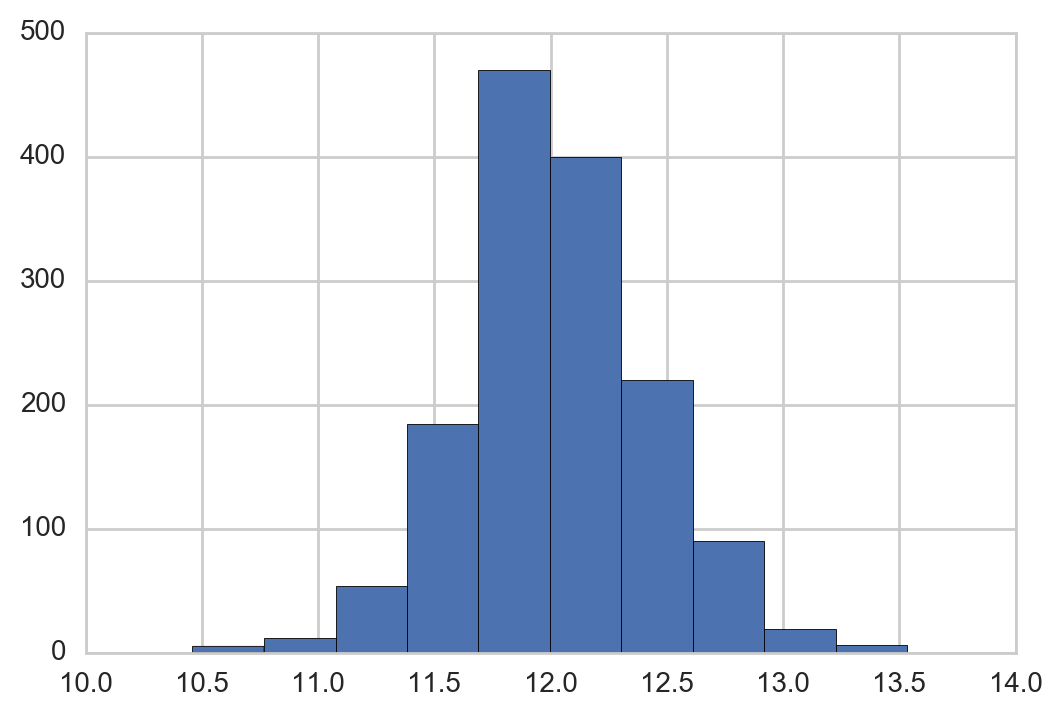

In [83]:
house['sqrtSalePrice'] = np.sqrt(house.SalePrice)
house['logSalePrice'] = np.log(house.SalePrice)

house.logSalePrice.hist()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [84]:
print (house[['YearBuilt','SalePrice']].corr())
print (house[['YearBuilt','sqrtSalePrice']].corr())
print (house[['YearBuilt','logSalePrice']].corr())

           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000
               YearBuilt  sqrtSalePrice
YearBuilt       1.000000       0.564284
sqrtSalePrice   0.564284       1.000000
              YearBuilt  logSalePrice
YearBuilt       1.00000       0.58657
logSalePrice    0.58657       1.00000


In [85]:
# There is a stronger correlation between YearBuilt variable and the transformed sale price

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

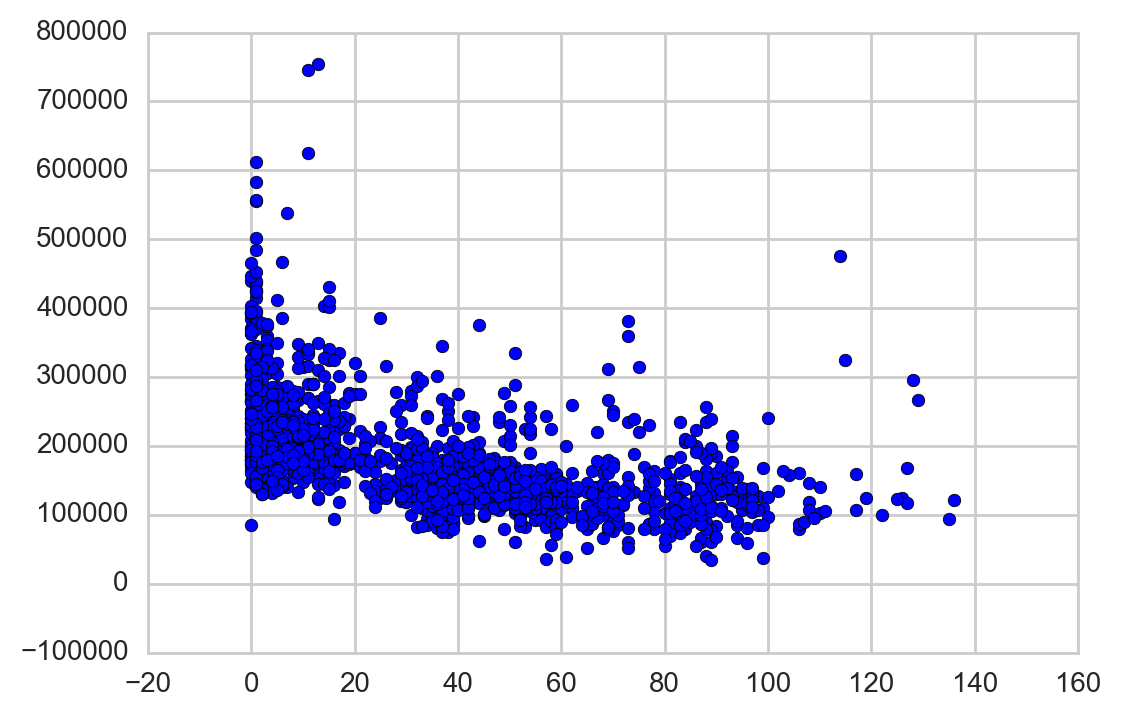

In [86]:
house['AgeOfHouse'] = house['YrSold'] - house['YearBuilt']

sns.plt.scatter(house.AgeOfHouse, house.SalePrice)

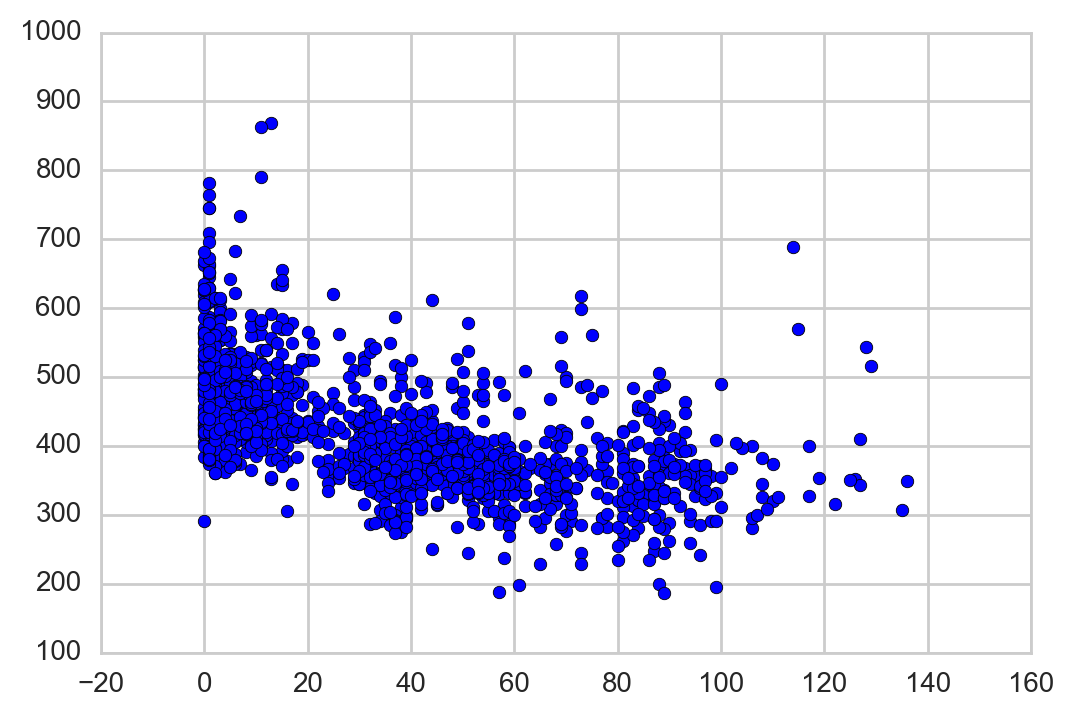

In [87]:
sns.plt.scatter(house.AgeOfHouse, house.sqrtSalePrice)

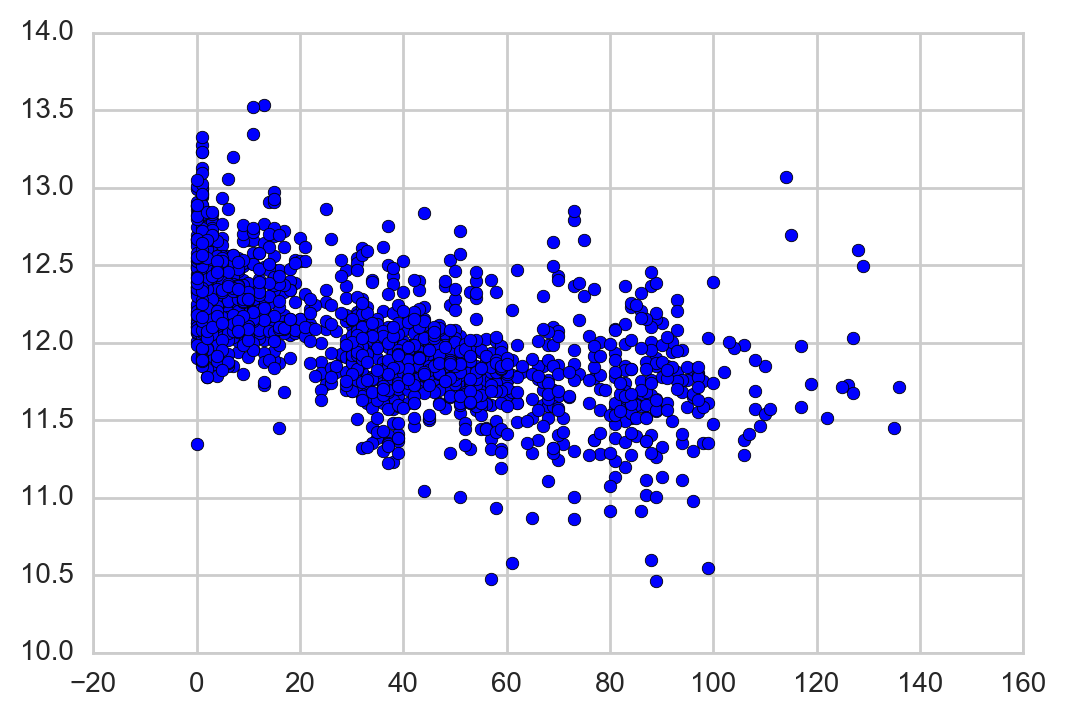

In [88]:
sns.plt.scatter(house.AgeOfHouse, house.logSalePrice)

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

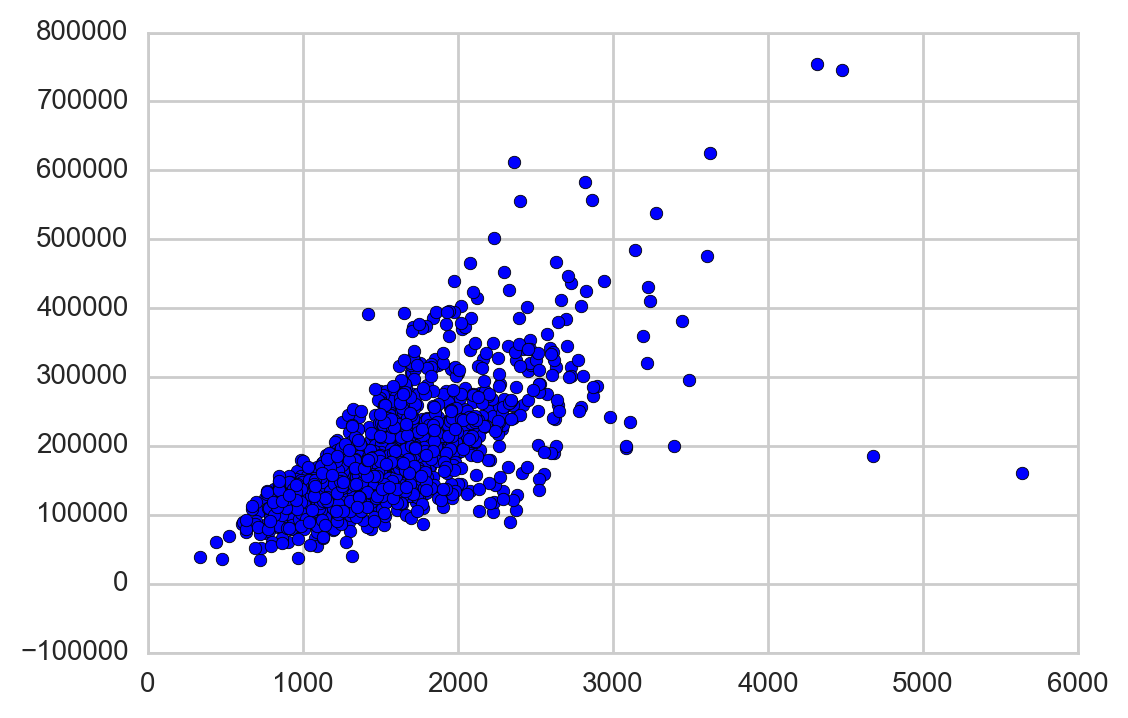

In [89]:
sns.plt.scatter(house.GrLivArea, house.SalePrice)

In [90]:
print (house[['GrLivArea', 'SalePrice']].corr())

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000


In [91]:
# Total livable square feet or GrLivArea and SalePrice have an extremely high correlation 

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

In [92]:
house.columns.unique()

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [93]:
#I wanted to find the correlation between garage area and sale price of a home. My thinking was
#that in most cases, the sale price of a home would be higher given a larger garage area

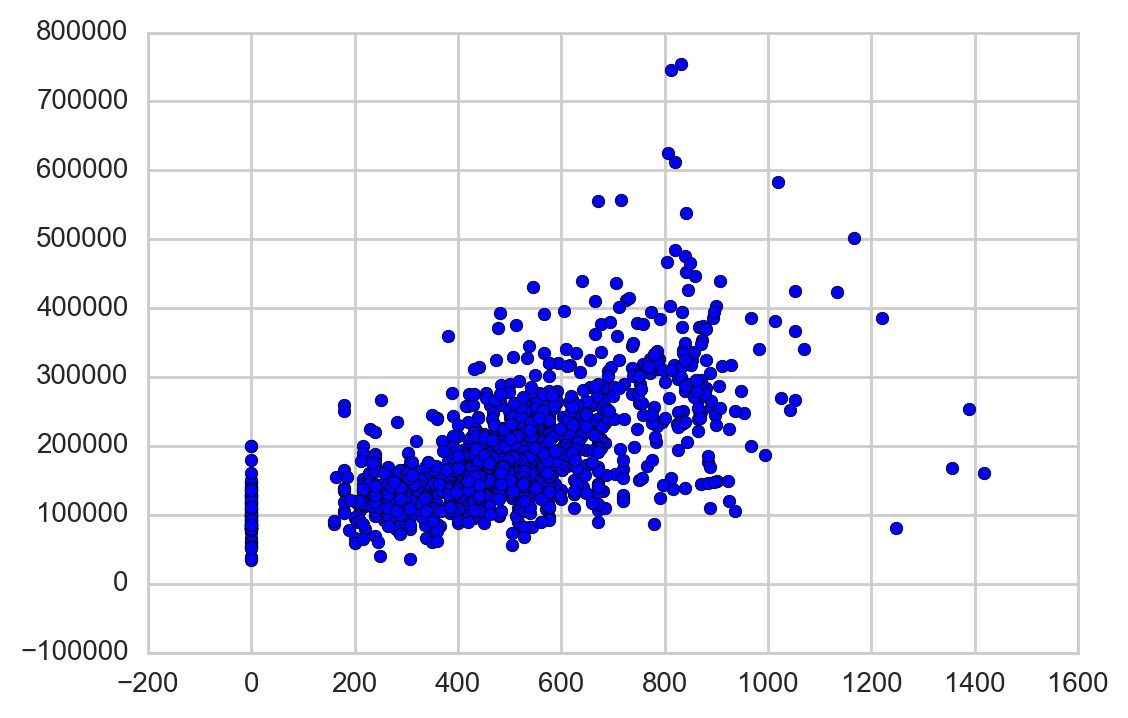

In [94]:
sns.plt.scatter(house.GarageArea, house.SalePrice)

In [95]:
print(house[['GarageArea','SalePrice']].corr())

            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [96]:
res_houses = house[house['MSZoning'] != 'C (all)']

res_houses.MSZoning.unique()


array(['RL', 'RM', 'FV', 'RH'], dtype=object)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [97]:
res_houses.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1443
MiscFeature     1398
Alley           1361
Fence           1172
FireplaceQu      681
LotFrontage      259
GarageFinish      79
GarageCond        79
GarageType        79
GarageYrBlt       79
GarageQual        79
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [98]:
res_houses.drop('Alley', 1, inplace=True)
res_houses.drop('PoolQC', 1, inplace=True)
res_houses.drop('MiscFeature', 1, inplace=True)
res_houses.drop('Fence', 1, inplace=True)
res_houses.drop('FireplaceQu', 1, inplace=True)
res_houses.drop('LotFrontage', 1, inplace=True)
res_houses.drop('GarageFinish', 1, inplace=True)
res_houses.drop('GarageCond', 1, inplace=True)
res_houses.drop('GarageType', 1, inplace=True)
res_houses.drop('GarageYrBlt', 1, inplace=True)
res_houses.drop('GarageQual', 1, inplace=True)
res_houses.drop('BsmtExposure', 1, inplace=True)
res_houses.drop('BsmtFinType2', 1, inplace=True)
res_houses.drop('BsmtFinType1', 1, inplace=True)
res_houses.drop('BsmtCond', 1, inplace=True)
res_houses.drop('BsmtQual', 1, inplace=True)
res_houses.drop('MasVnrArea', 1, inplace=True)
res_houses.drop('MasVnrType', 1, inplace=True)
res_houses.drop('Electrical', 1, inplace=True)

/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/aneelanand/an

In [99]:
res_houses.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqrtSalePrice,logSalePrice,AgeOfHouse
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,456.618002,12.247694,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,426.028168,12.109011,31
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,472.757866,12.317167,7
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,374.165739,11.849398,91
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,500.000000,12.429216,8


### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [100]:
res_houses.columns.unique()

array(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'sqrtSalePrice',
       'logSalePrice', 'AgeOfHouse'], dtype=obj

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

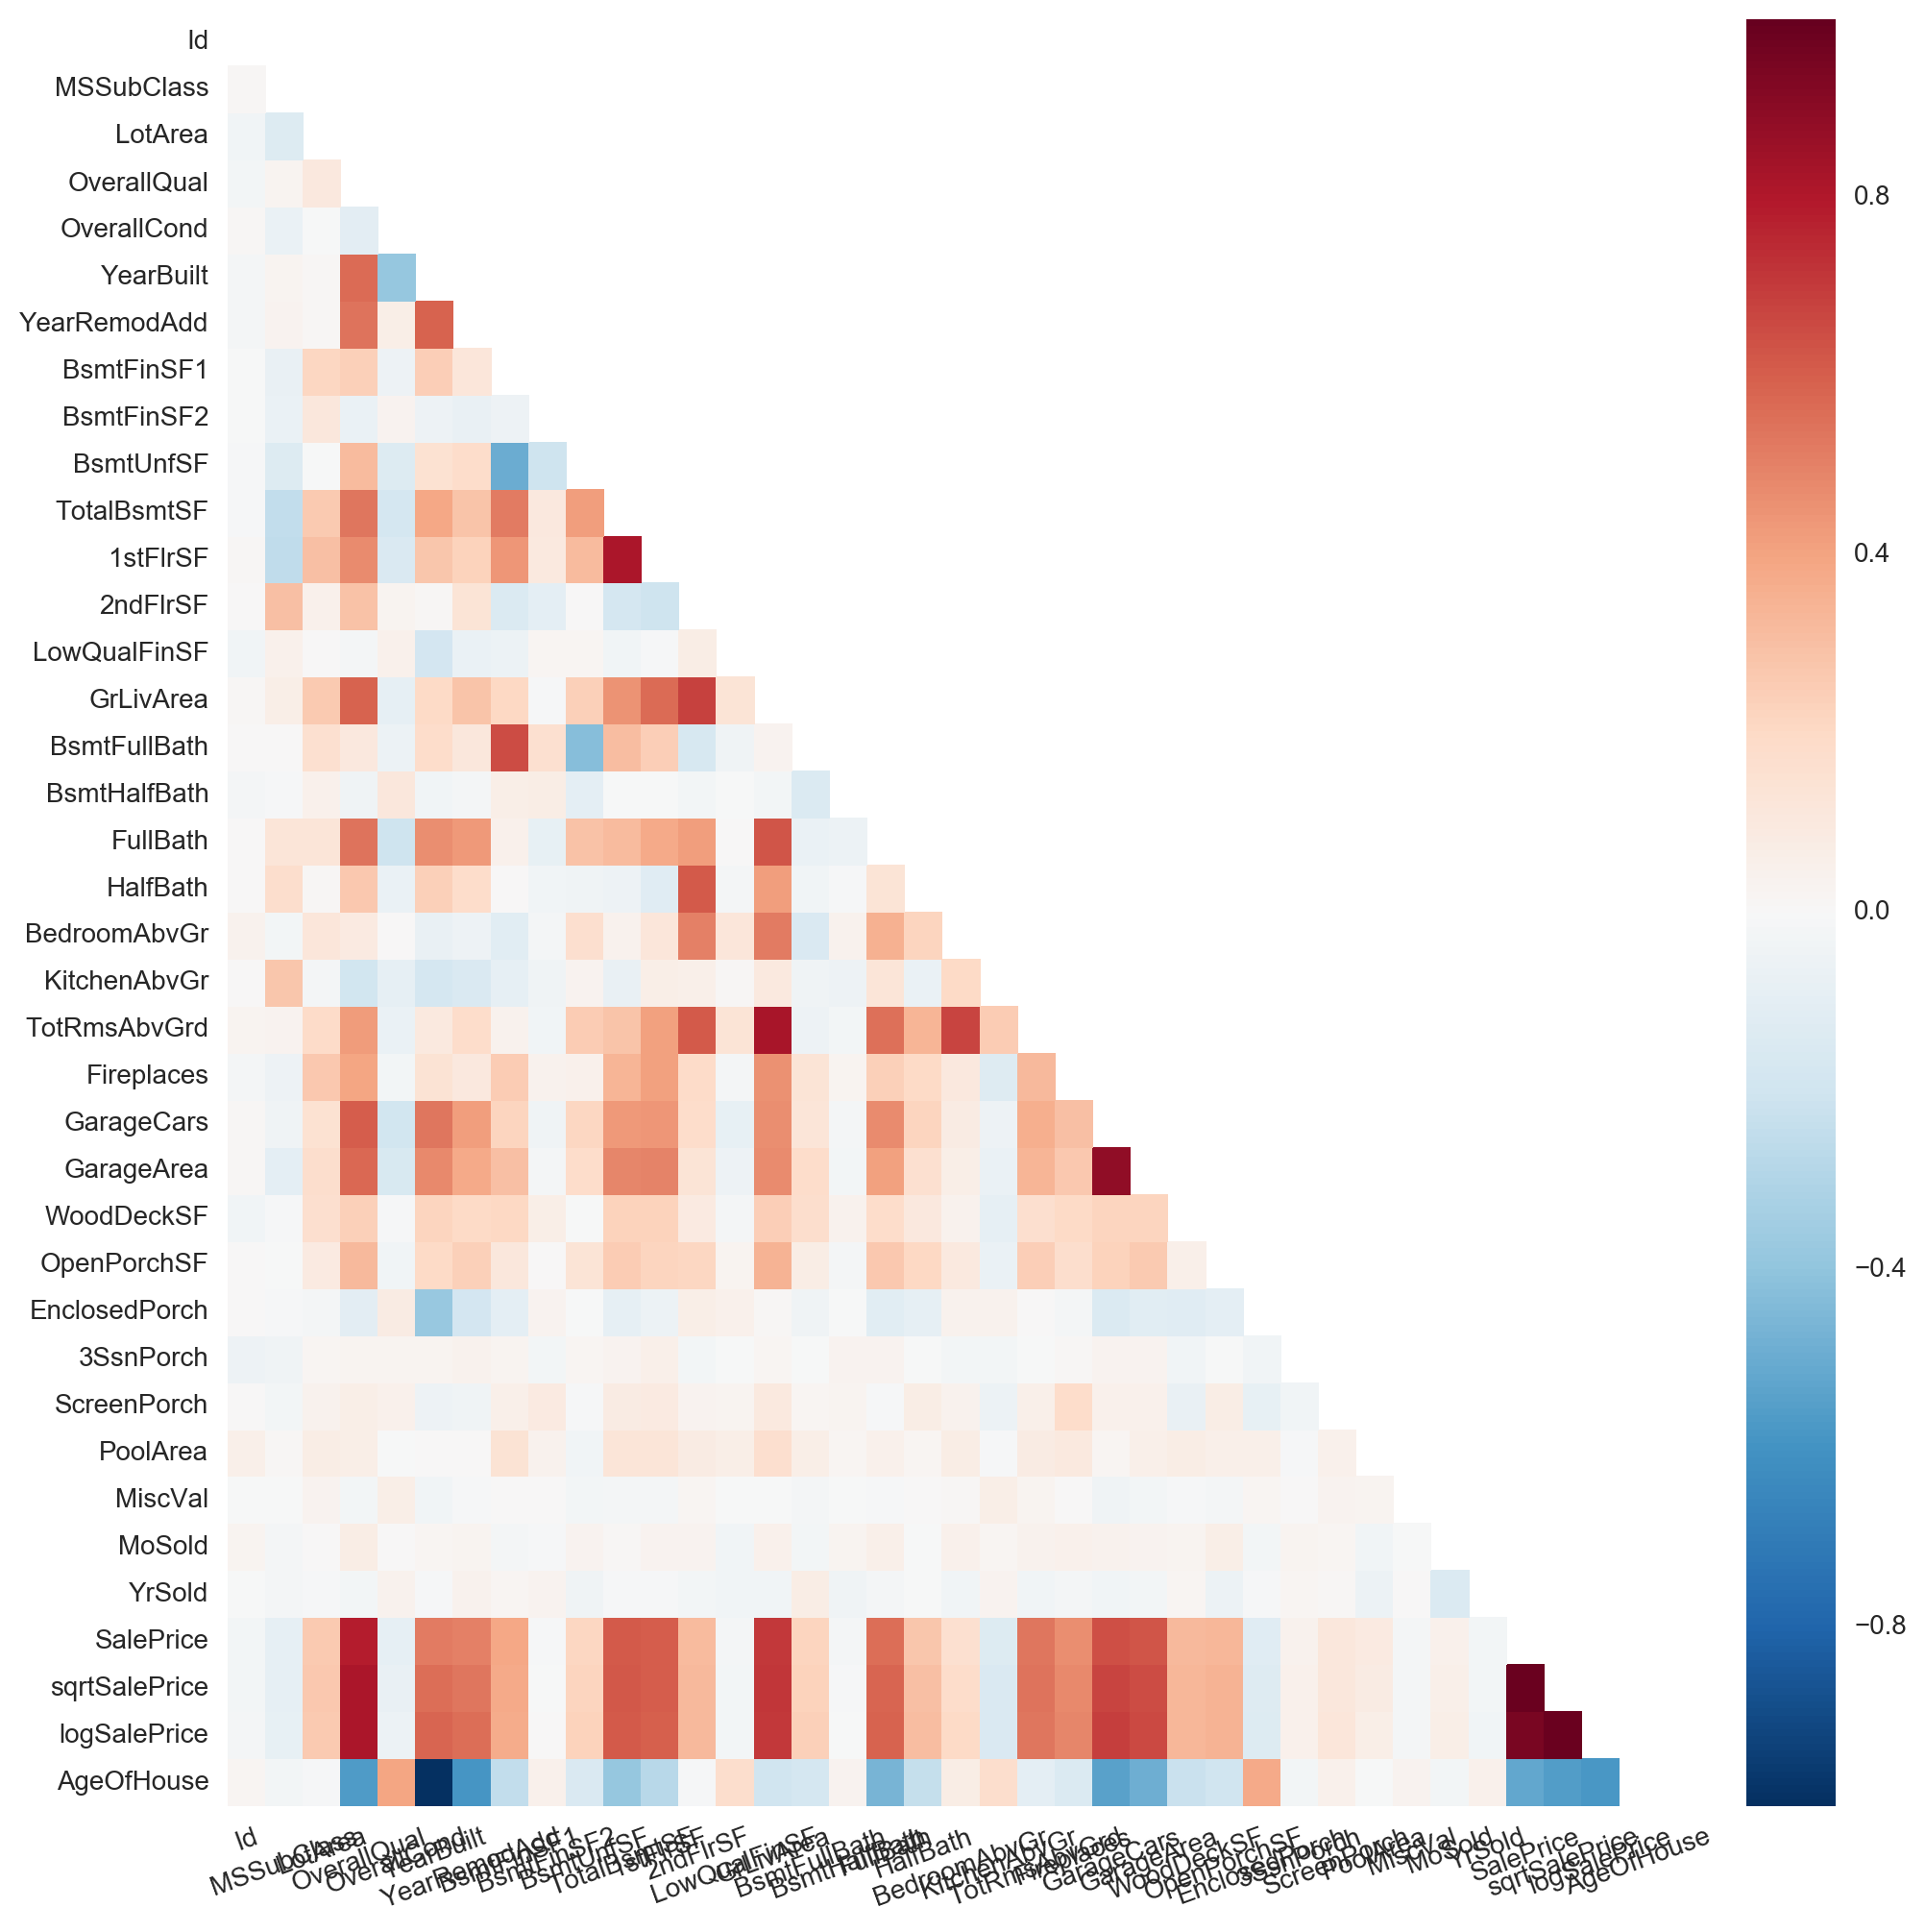

In [101]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=20)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(res_houses)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

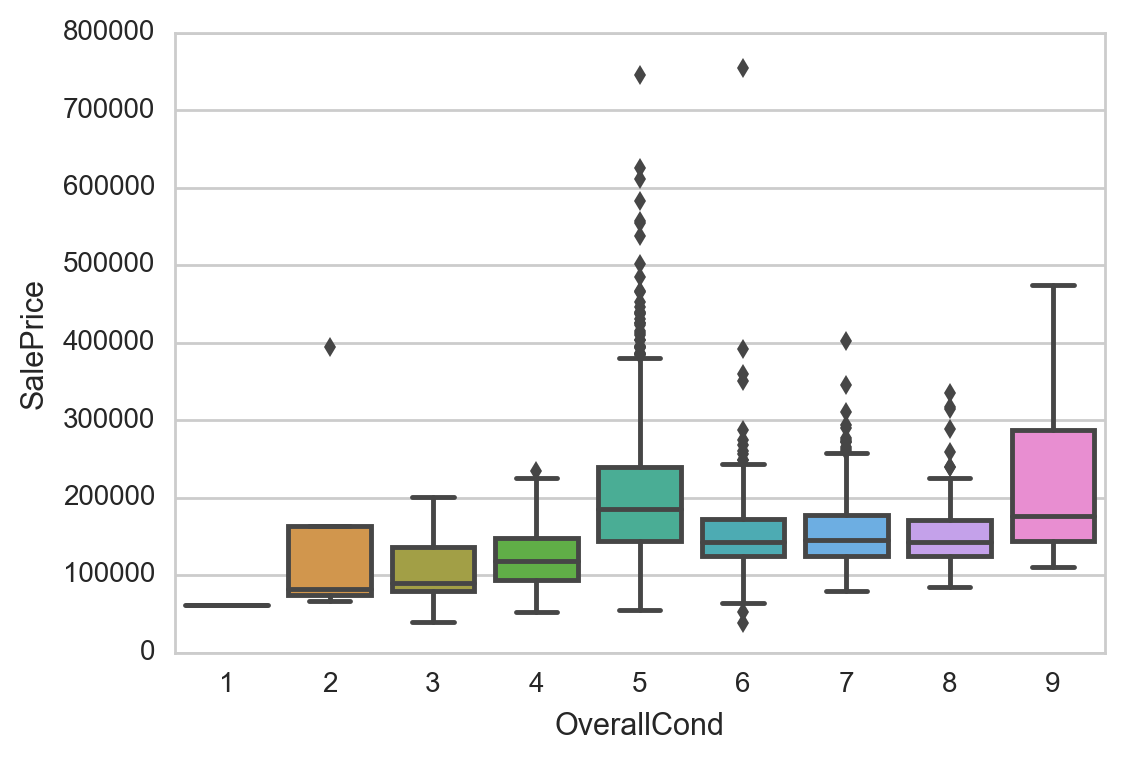

In [102]:
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=res_houses)

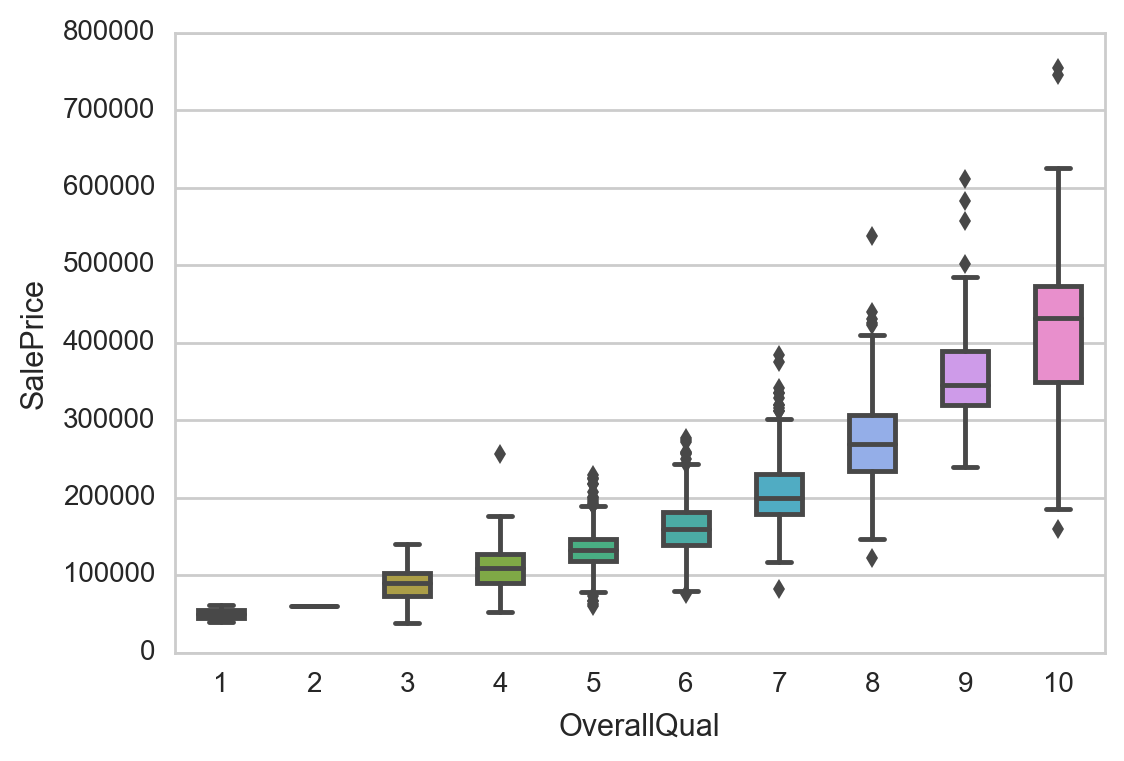

In [103]:
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=res_houses, width=0.5)

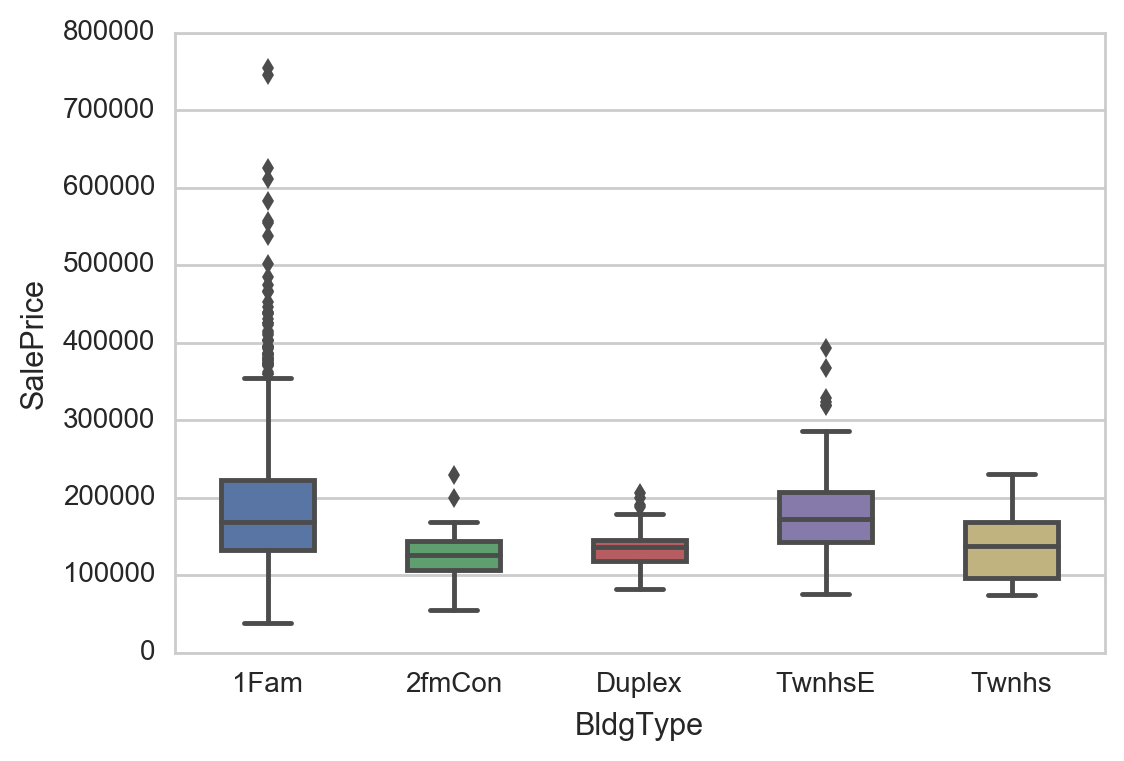

In [104]:
ax = sns.boxplot(x="BldgType", y="SalePrice", data=res_houses, width=0.5)

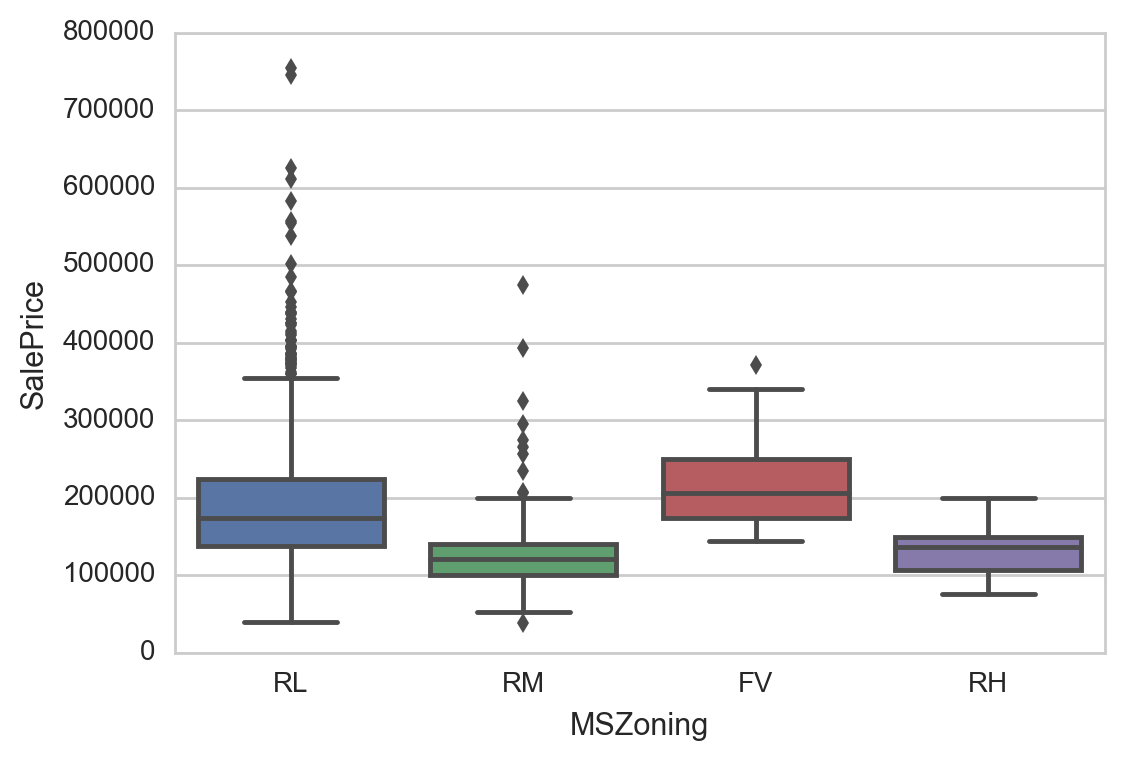

In [105]:
ax = sns.boxplot(x="MSZoning", y="SalePrice", data=res_houses)

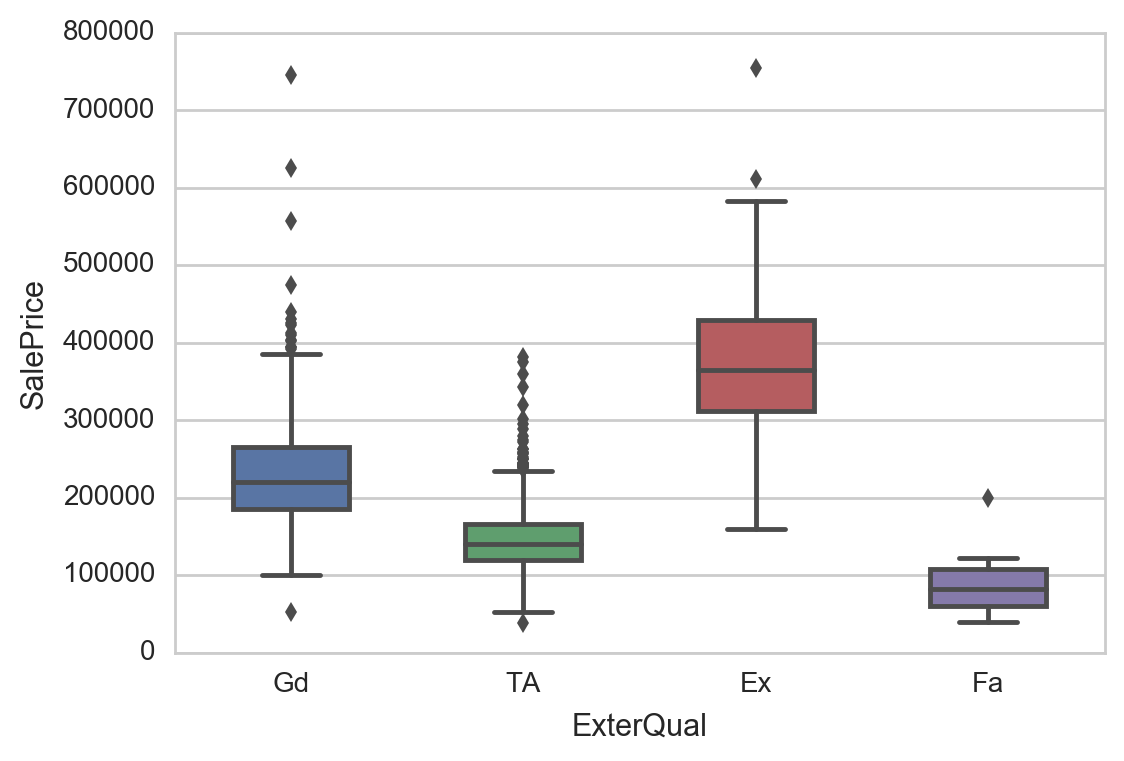

In [106]:
ax = sns.boxplot(x="ExterQual", y="SalePrice", data=res_houses, width=0.5)

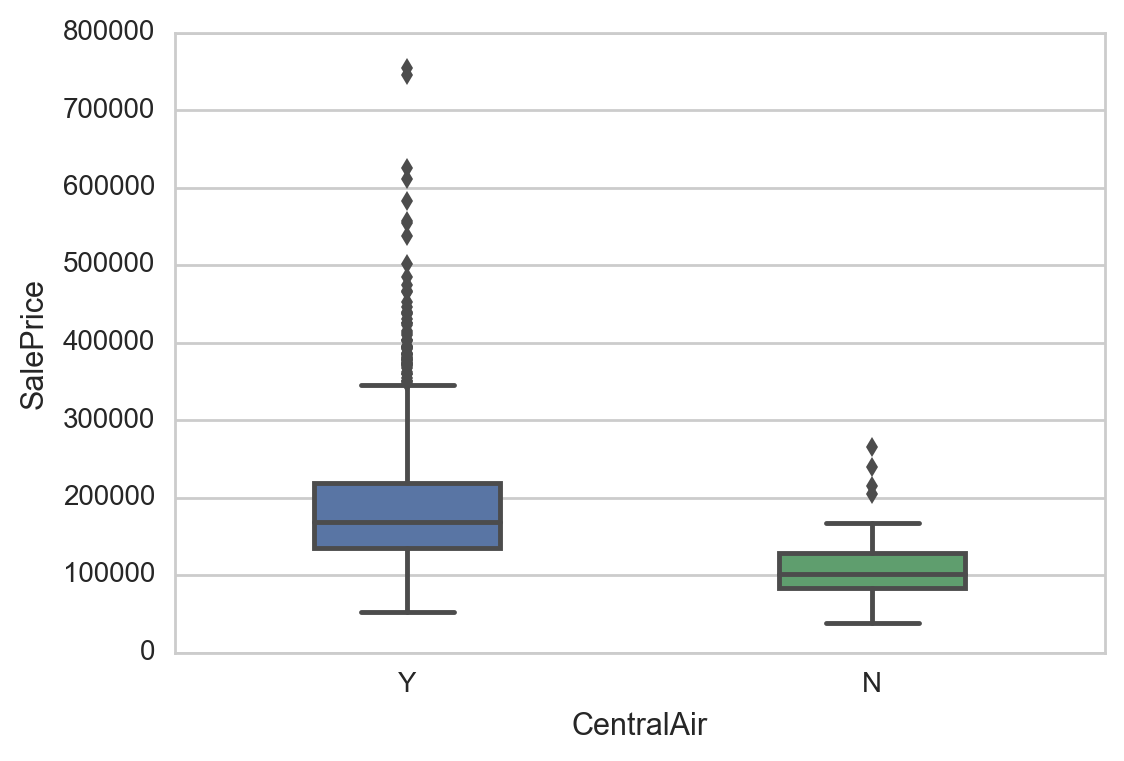

In [107]:
ax = sns.boxplot(x="CentralAir", y="SalePrice", data=res_houses, width=0.4)

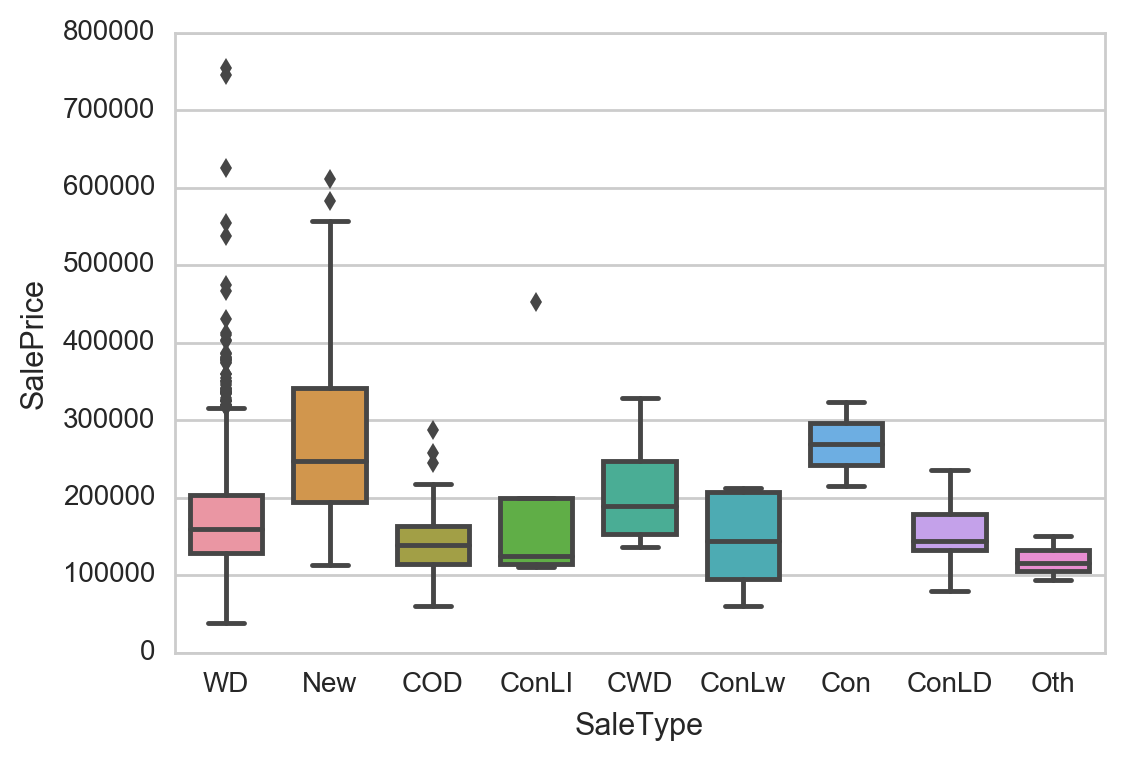

In [108]:
ax = sns.boxplot(x="SaleType", y="SalePrice", data=res_houses, width=0.7)

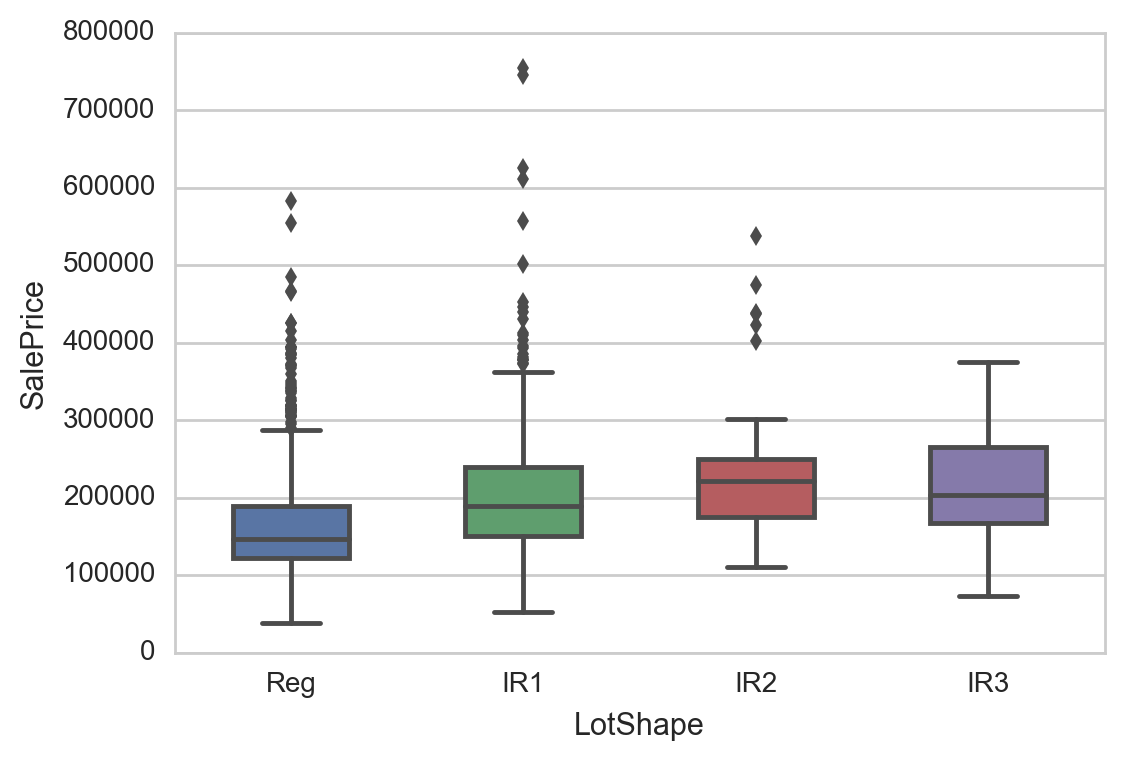

In [109]:
ax = sns.boxplot(x="LotShape", y="SalePrice", data=res_houses, width=0.5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


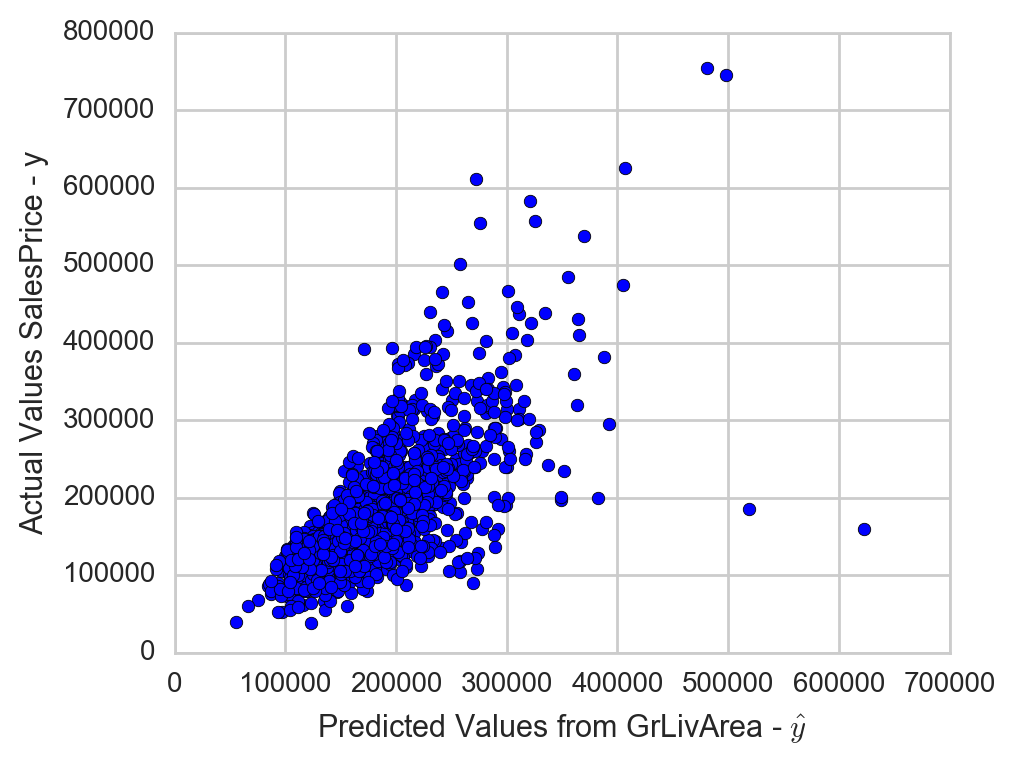

In [110]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm


X = res_houses.GrLivArea
y = res_houses.SalePrice
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)


plt.figure(figsize=(5,4))
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from GrLivArea - $\hat{y}$")
plt.ylabel("Actual Values SalesPrice - y")
plt.show()

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1461.
Date:                Mon, 05 Dec 2016   Prob (F-statistic):          1.38e-221
Time:                        08:48:28   Log-Likelihood:                -17906.
No. Observations:                1450   AIC:                         3.582e+04
Df Residuals:                    1448   BIC:                         3.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        1.95e+04   4489.318      4.344      0.000      1.07e+04  2.83e+04
GrLivArea    106.8430      2.795     38.220      0.000       101.359   112.327
==============================================================================
Omnibus:                      264.844   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3531.303
Skew:                           0.426   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                     4.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8.1 Multivariate regression predicting price with sklearn

### 8.1 Build an sklearn linear regression predicting sale price
Use all of your continuous measures as predictors (no categorical yet).

In [112]:
cont_houses = res_houses[['MSSubClass','LotArea','OverallQual','OverallCond',
                          'YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
                          '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
                         'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
                         'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                         '3SsnPorch','PoolArea','MoSold','YrSold','AgeOfHouse']]

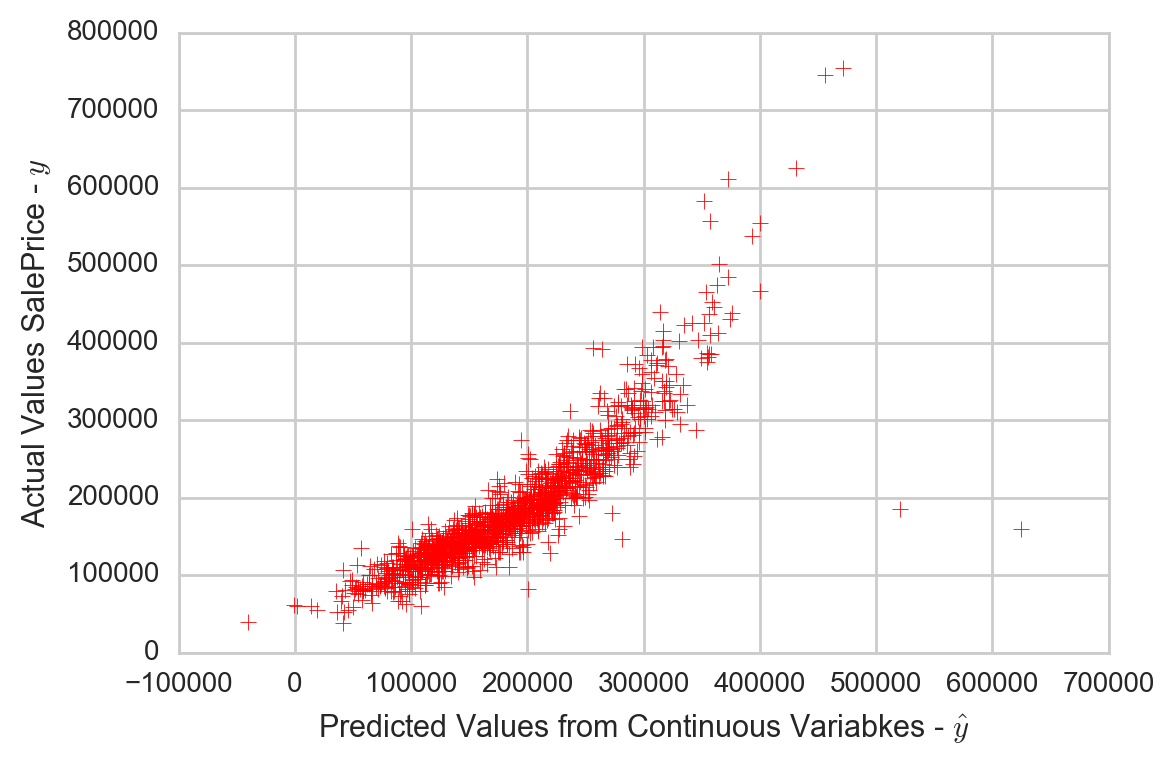

MSE: 1229427114.7


In [113]:
from sklearn.linear_model import LinearRegression

X = cont_houses
y = res_houses.SalePrice

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
#model = sm.OLS(y, X).fit()
model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Continuous Variabkes - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - $y$")
plt.show()

print ("MSE:", mean_squared_error(y, predictions))

### 8.2 Calculate the $R^2$ of your model.

In [114]:
score_r2 = model.score(X, y)
score_r2

0.80374986410911031

### 8.3 Plot the residuals against the true values.

In [115]:
my_residuals = res_houses.SalePrice - predictions
my_residuals.head(10)

0   -17366.836099
1   -13553.128797
2    -2590.399514
3   -59400.244614
4   -37865.519961
5   -35466.612639
6    37378.087664
7   -48077.464403
8   -66382.718686
9    24044.538061
Name: SalePrice, dtype: float64

### 8.4 Plot a histogram of the residuals.

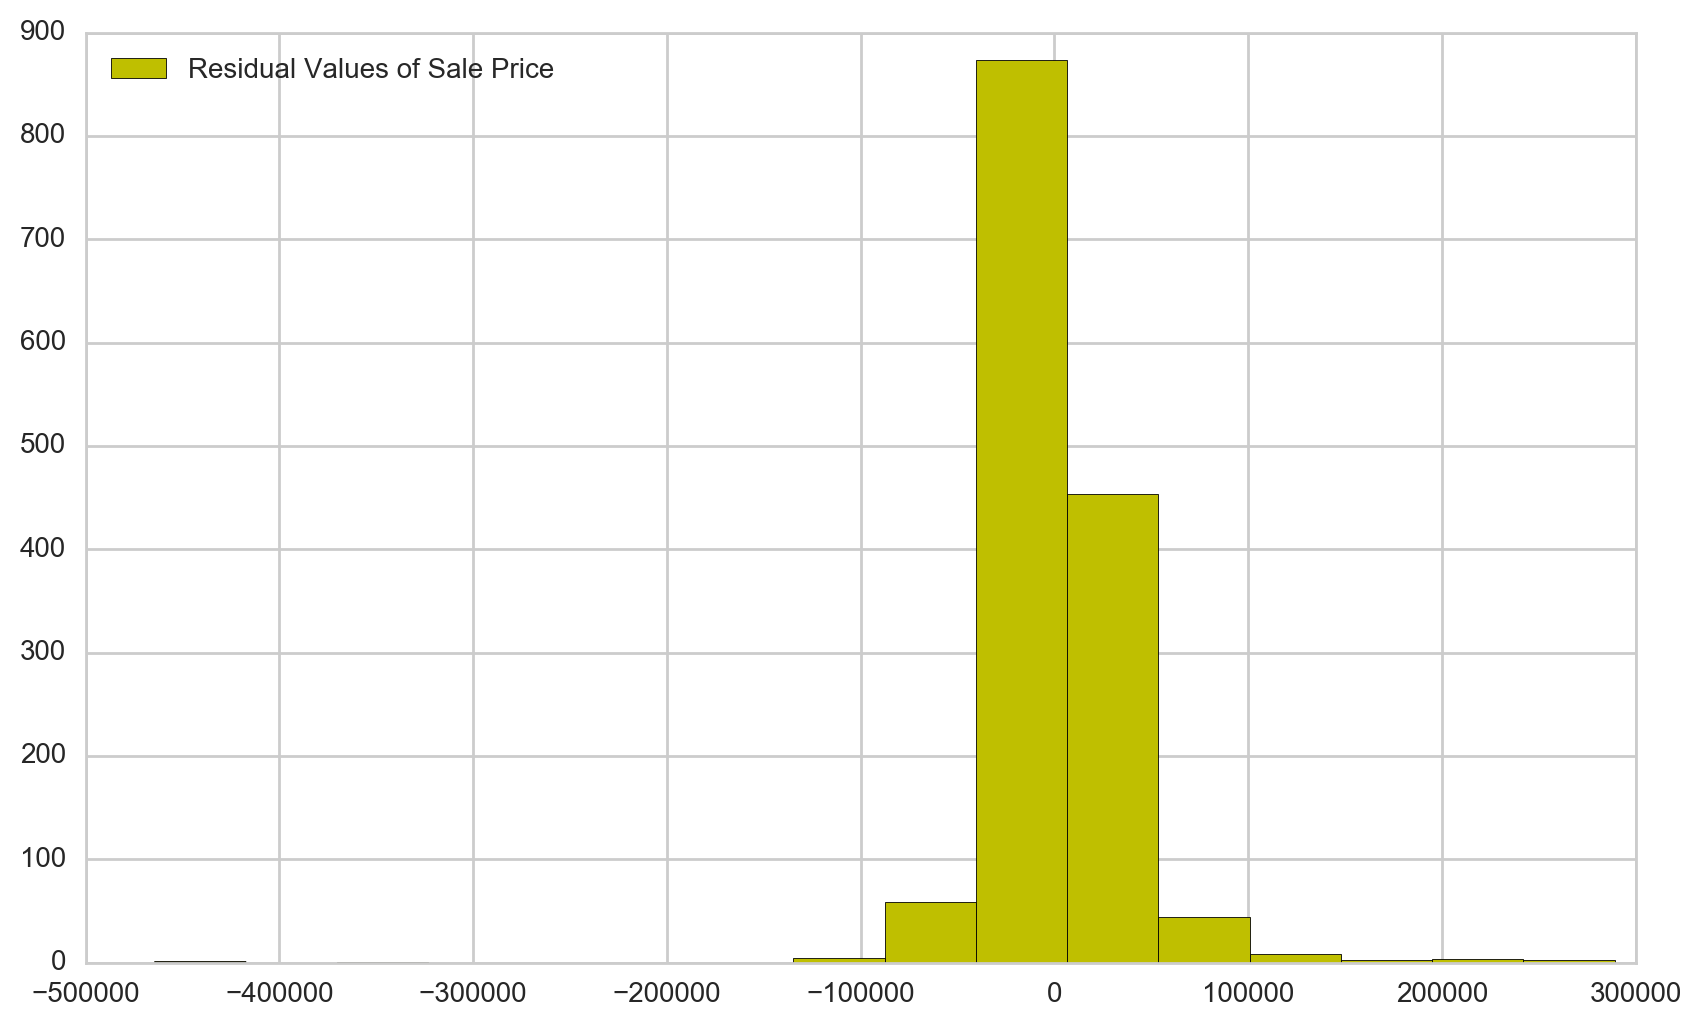

In [116]:
## Plot a histogram of the residuals
fig = plt.figure(figsize=(10,6))
my_residuals.hist(color='y', label='Residual Values of Sale Price', bins=16)
plt.legend(loc='upper left')
plt.show()

### 8.5 Make a plot to show the strength of the different coefficients.

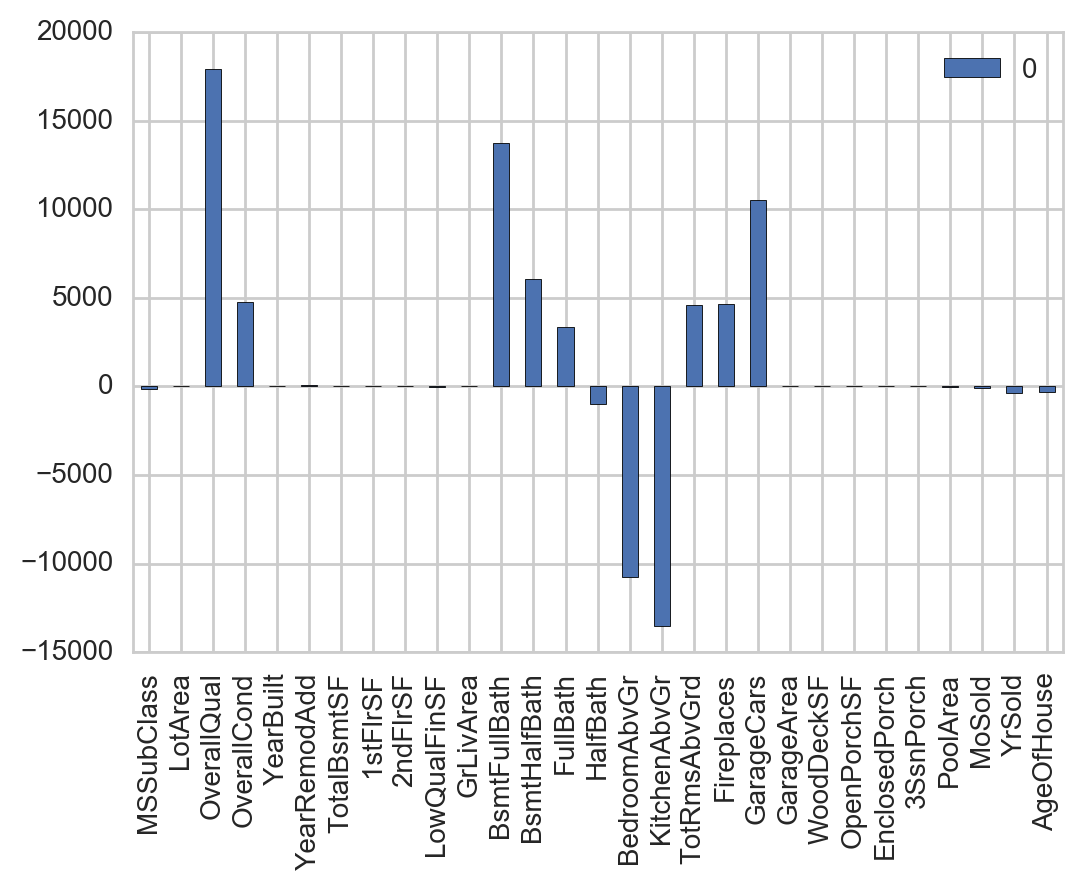

In [117]:
coef_df = pd.DataFrame(model.coef_)
coef_df.index = X.columns
coef_df.plot(kind='bar')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [118]:
import patsy

formula  =  "SalePrice ~ LotArea + OverallQual + OverallCond + BsmtFinSF1 + BsmtFinSF2 + BsmtHalfBath + \
BsmtUnfSF + TotalBsmtSF + LowQualFinSF + TotRmsAbvGrd + WoodDeckSF +OpenPorchSF + PoolArea + \
MiscVal + GrLivArea + AgeOfHouse + MSZoning + Street +LotShape + LandContour + Utilities + LotConfig + LandSlope + \
Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + \
MasVnrType + ExterQual + ExterCond + Foundation+ BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + \
Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + FireplaceQu + GarageType + GarageFinish +\
GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition - 1"

y, X     =  patsy.dmatrices(formula, data=house, return_type="dataframe")

In [119]:
pd.get_dummies(X).head(5)

,MSZoning[C (all)],MSZoning[FV],MSZoning[RH],MSZoning[RL],MSZoning[RM],Street[T.Pave],LotShape[T.IR2],LotShape[T.IR3],LotShape[T.Reg],LandContour[T.HLS],...,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,GrLivArea,AgeOfHouse
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,284.0,1262.0,0.0,6.0,298.0,0.0,0.0,0.0,1262.0,31.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,434.0,920.0,0.0,6.0,0.0,42.0,0.0,0.0,1786.0,7.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,540.0,756.0,0.0,7.0,0.0,35.0,0.0,0.0,1717.0,91.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,490.0,1145.0,0.0,9.0,192.0,84.0,0.0,0.0,2198.0,8.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,317.0,1686.0,0.0,7.0,255.0,57.0,0.0,0.0,1694.0,3.0


### 9.2 Fit a linear regression using all of the predictors and score it.

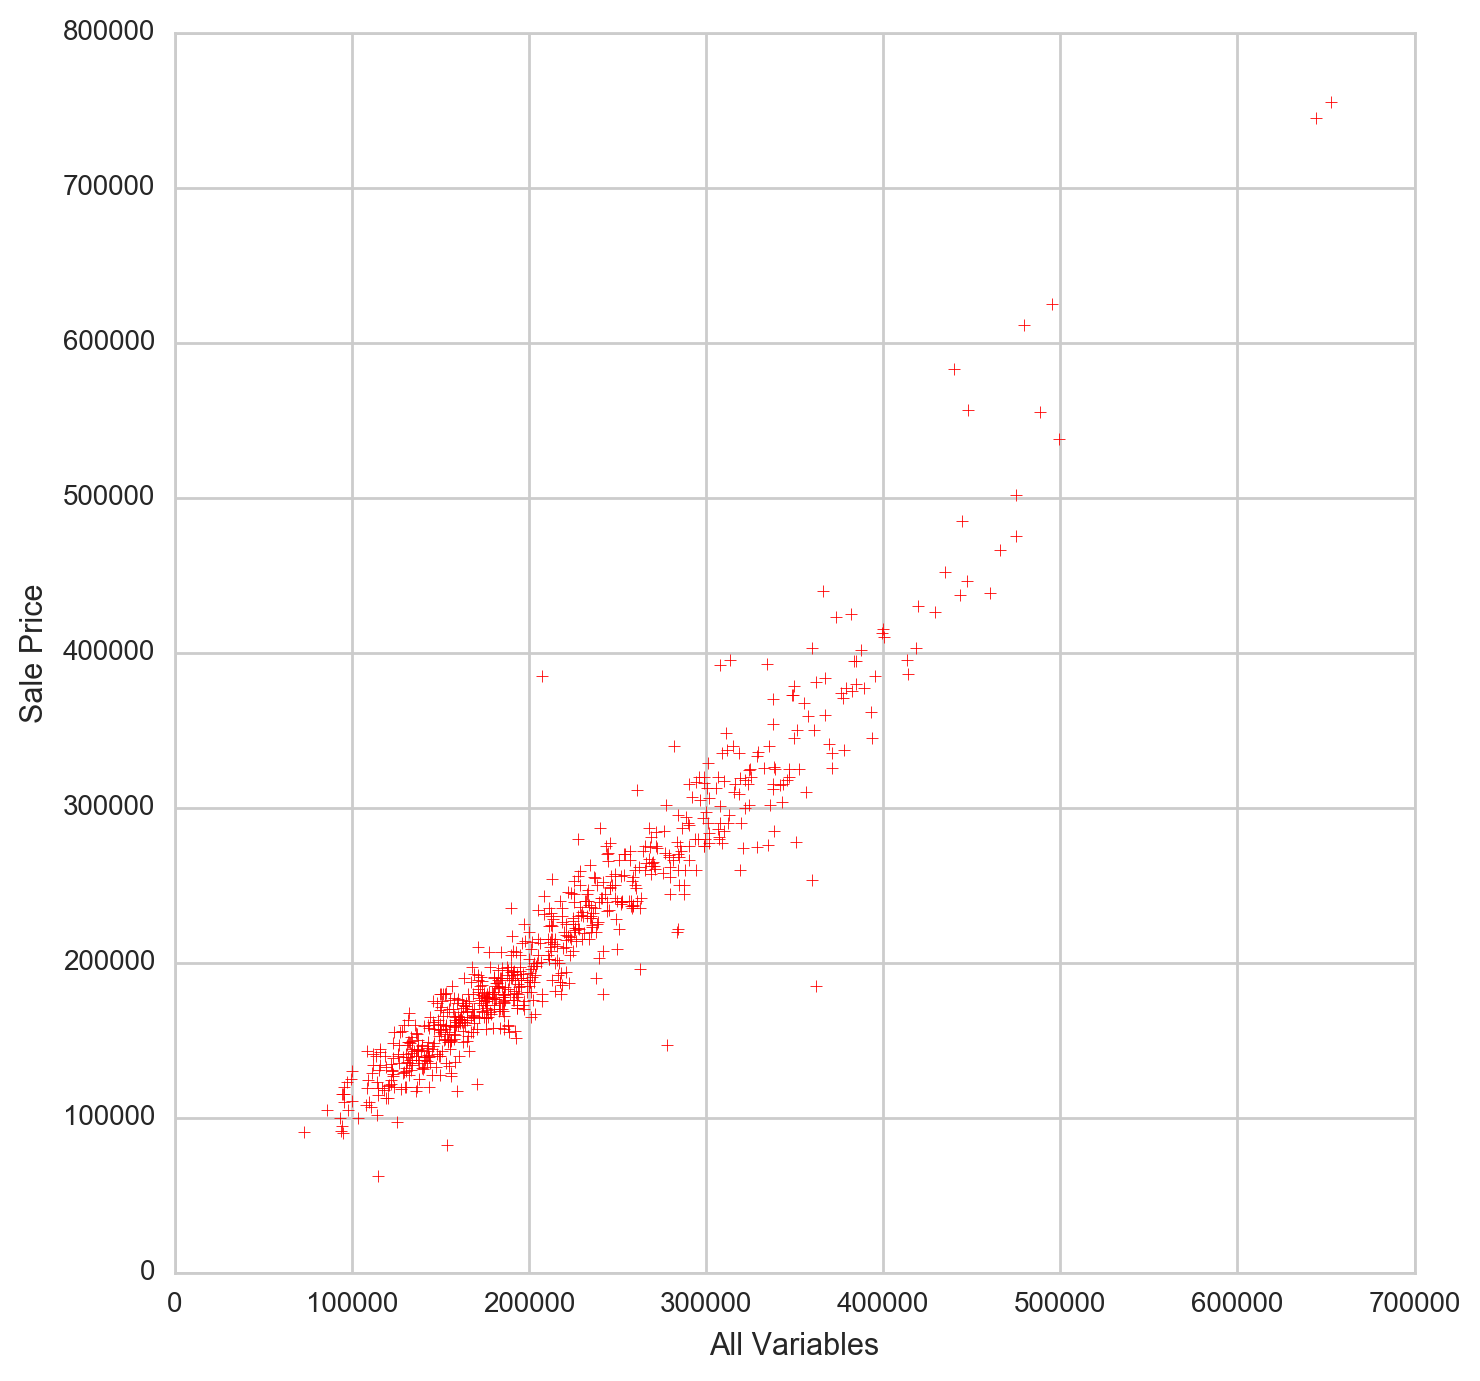

In [120]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=20, c='r', marker='+', zorder=10)
plt.xlabel("All Variables")
plt.ylabel("Sale Price")
plt.show()

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

There are too many variables to the model is extremely overfiting

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

Cross-validated scores: [ 0.80658222 -3.26588631  0.83084104 -2.32616171  0.88081592  0.90374477
  0.90492518 -0.2805131   0.88432672  0.87630989  0.82907343  0.23174872
  0.84499585  0.88253442  0.7770908   0.68566724  0.79270734 -1.54863076
  0.79951843  0.83610776]
Cross-Predicted Accuracy: 0.479923220641


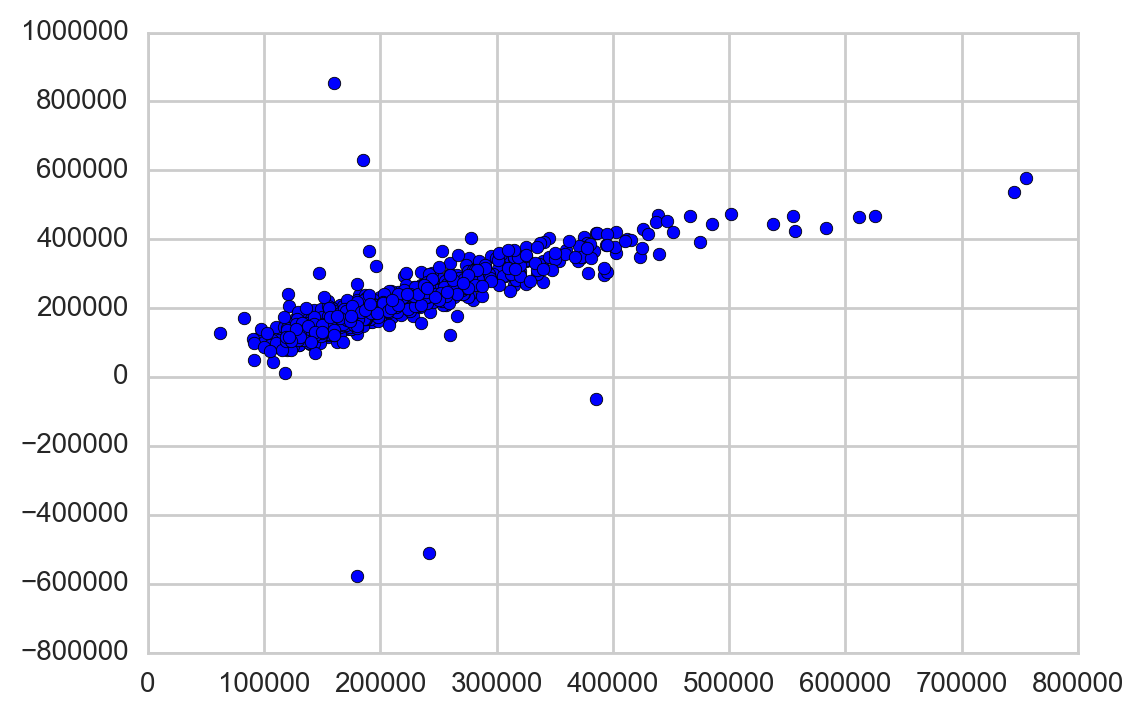

In [121]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=20)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=20)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)

print ("Cross-Predicted Accuracy:", accuracy)

### 10.2 What does the cross-validated average $R^2$ tell you?

The cross validated average R^2 tells us what correlation to expect when we actually use the regression equation

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


A negative R^2 means that your model performed worse than the baseline of simply guessing the mean of the target

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [125]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

In [126]:
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = res_houses.SalePrice.values

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [124]:
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(Xn, y)

print (optimal_lasso.alpha_)

ValueError: X and y have inconsistent dimensions (747 != 1450)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

The lasso performs slightly better than the Ridge. The Lasso will choose the "best" of the correlated variables and zero-out the redundant ones

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**